# Naive Bayes Classifier

In [9]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load data
data = pd.read_csv('data/test.csv')

# Split data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Create a Gaussian Naive Bayes object
gnb = GaussianNB()

# Create a pipeline
pipe = Pipeline(steps=[('s', StandardScaler()), ('m', gnb)])

# Define grid
grid = {'m__var_smoothing': [0, 0.5, 1, 2, 3, 4]}

# Define search
search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, scoring='accuracy')

# Perform the search
results = search.fit(X, y)

# Summarize
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# Cross validation with best params
model = GaussianNB(var_smoothing=results.best_params_['m__var_smoothing'])
cv_results = cross_val_score(model, X, y, cv=5)

# Output the mean score
print('CV Accuracy: %.3f' % cv_results.mean())

Best Mean Accuracy: 0.542
Best Config: {'m__var_smoothing': 4}
CV Accuracy: 0.483


c:\Users\10150\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\10150\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\10150\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
c:\Users\10150\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
c:\Users\10150\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
c:\Users\10150\an

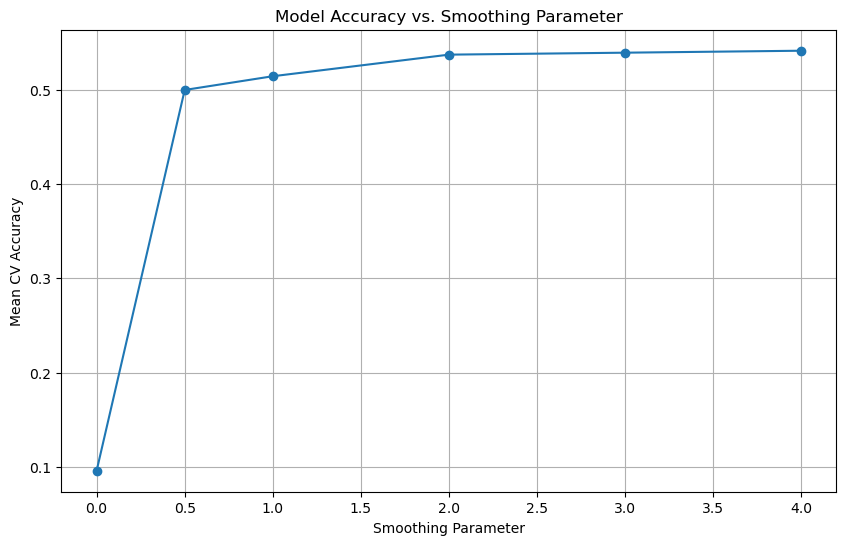

In [10]:
import matplotlib.pyplot as plt

# Get the mean test score for each smoothing value
mean_test_scores = results.cv_results_['mean_test_score']

# Get the smoothing values
smoothing_values = results.param_grid['m__var_smoothing']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(smoothing_values, mean_test_scores, marker='o')
plt.title('Model Accuracy vs. Smoothing Parameter')
plt.xlabel('Smoothing Parameter')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN object
knn = KNeighborsClassifier()

# Create a pipeline
pipe = Pipeline(steps=[('s', StandardScaler()), ('m', knn)])

# Define grid
grid = {'m__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]}

# Define search
search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, scoring='accuracy')

# Perform the search
results = search.fit(X, y)

# Summarize
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# Cross validation with best params
model = KNeighborsClassifier(n_neighbors=results.best_params_['m__n_neighbors'])
cv_results = cross_val_score(model, X, y, cv=5)

# Output the mean score
print('CV Accuracy: %.3f' % cv_results.mean())

c:\Users\10150\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Mean Accuracy: 0.535
Best Config: {'m__n_neighbors': 6}
CV Accuracy: 0.454


c:\Users\10150\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


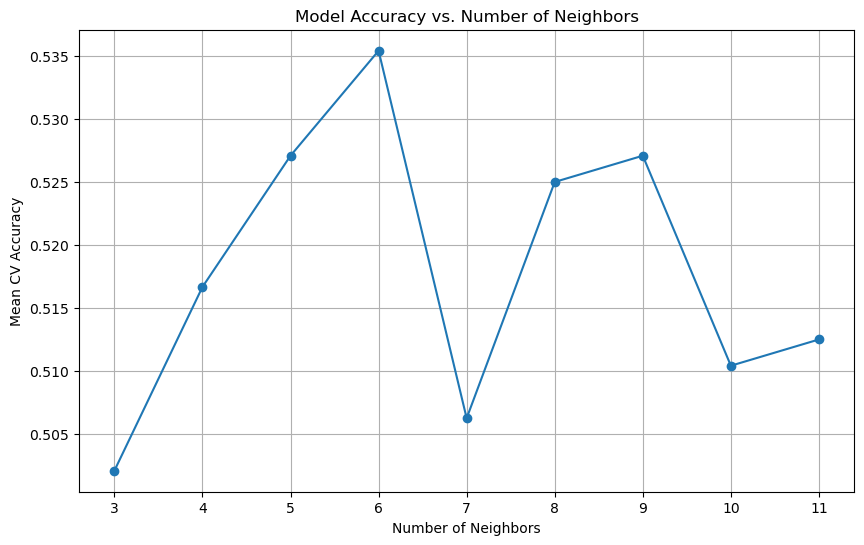

In [12]:
# Get the mean test score for each neighbor value
mean_test_scores = results.cv_results_['mean_test_score']

# Get the neighbor values
neighbor_values = results.param_grid['m__n_neighbors']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(neighbor_values, mean_test_scores, marker='o')
plt.title('Model Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a basic ANN model
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the model
ann.fit(X_train, y_train)

# Evaluate the model
score = ann.score(X_test, y_test)

print('Test Accuracy: %.3f' % score)

Test Accuracy: 0.583
